# Galaxia: Generating synthetic surveys

## Parameters/outputs: 

For files named test1_*, they are contained in the file $\texttt{test1parameters}$, which is located in the /u/casey_lam/scratch directory on sloop. In particular, we try to get all stars (so magnitude limits are -1000 to 1000), we want a full sky survey (so geometryOption is set to 0), and fSample is 10${}^{-6}$ such that the computer doesn't become stupid slow. 

For files named testLOS_*, they are contained in the file $\texttt{testLOSparameters}$, which is also located in /u/casey_lam/scratch. Here, we are considering the line of sight to a particular OGLE event, OGLE-2017-BLG-0019. Again we want all stars, so magnitude limits are -1000 to 1000, the patch of sky is OGLE's field of view (35' x 35' = 0.34 deg${}^2$) so the surveyArea is set to 0.34. (The first time I ran this, I left fSample = 1 since I figured it wouldn't be that many stars... it ended up making 155 million stars, so I reran it with an fSample = 10${}^{-4}$.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import astropy.units as u
import astropy.coordinates as coord

First, we consider the full sky survey, as a check. We make plots of mean proper motion and velocity dispersion as a function of distance from the Sun. Additionally we plot the motion of the stars in the Galactic Plane (in galactocentric coordinates) just as an additional check of understanding.

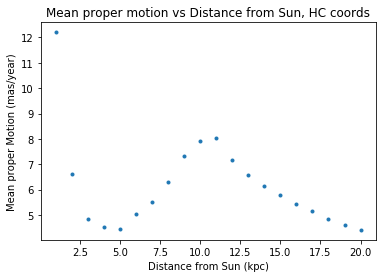

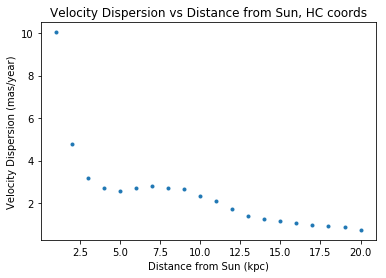

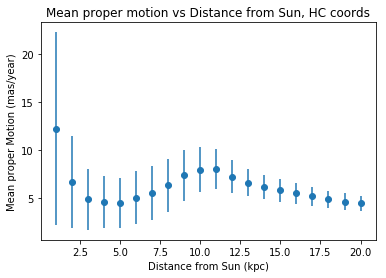

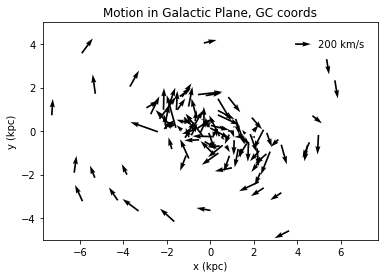

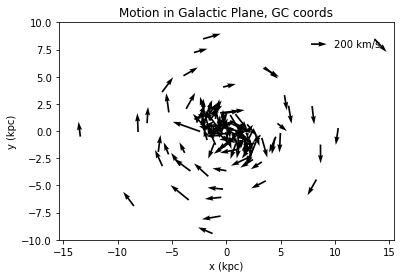

In [2]:
#load px, py, pz (cartesian heliocentric positions) 
HCx = np.loadtxt("test1_px") #kpc
HCy = np.loadtxt("test1_py") #kpc
HCz = np.loadtxt("test1_pz") #kpc

#load vx, vy, vz (cartesian heliocentric velocities) 
HCxvel = np.loadtxt("test1_vx") #km/s
HCyvel = np.loadtxt("test1_vy") #km/s
HCzvel = np.loadtxt("test1_vz") #km/s

#calculate the magnitude of the velocity and position vector in HC coordinates
HCvel = []
for i in np.arange(len(HCxvel)):
    HCvel.append(np.sqrt(HCxvel[i]**2 + HCyvel[i]**2 + HCzvel[i]**2))
HCvel = np.array(HCvel)

HCradius = []
for i in np.arange(len(HCx)):
    HCradius.append(np.sqrt(HCx[i]**2 + HCy[i]**2 + HCz[i]**2))
HCradius = np.array(HCradius)

HCvelvec = np.array([HCxvel, HCyvel, HCzvel])
HCposvec = np.array([HCx, HCy, HCz])
vDOTr = (HCxvel*HCx + HCyvel*HCy + HCzvel*HCz)/(HCradius)
rHAT = HCposvec/HCradius
propermotion = np.linalg.norm(HCvelvec - vDOTr*rHAT, axis = 0)/(4.74 * HCradius)

#calculate average proper motion and velocity dispersion as a function of distance from the Sun
HCvelvec = np.array([HCxvel, HCyvel, HCzvel])
HCposvec = np.array([HCx, HCy, HCz])
vDOTr = (HCxvel*HCx + HCyvel*HCy + HCzvel*HCz)/(HCradius)
rHAT = HCposvec/HCradius
allpropermotion = np.linalg.norm(HCvelvec - vDOTr*rHAT, axis = 0)/(4.74 * HCradius)

averagemotion = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
veldispersion = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in np.arange(20):
    propermotions = allpropermotion[(HCradius > i) & (HCradius <= i + 1)]
    averagemotion[i] = np.mean(propermotions)
    veldispersion[i] = np.std(propermotions)
radialdist = np.arange(1,21)

plt.plot(radialdist, averagemotion, '.')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Mean proper Motion (mas/year)")
plt.title("Mean proper motion vs Distance from Sun, HC coords")
plt.show()

plt.plot(radialdist, veldispersion, '.')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Velocity Dispersion (mas/year)")
plt.title("Velocity Dispersion vs Distance from Sun, HC coords")
plt.show()

plt.figure()
plt.errorbar(radialdist, averagemotion, yerr=veldispersion,fmt='o')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Mean proper Motion (mas/year)")
plt.title("Mean proper motion vs Distance from Sun, HC coords")
plt.show()

sun = np.loadtxt("test1_center") 
#first three values are positions in kpc
#last three values are velocities in km/s

#convert to galactocentric coordinates
GCx = HCx + sun[0]
GCy = HCy + sun[1]
GCz = HCz + sun[2]
GCxvel = HCxvel + sun[3]
GCyvel = HCyvel + sun[4]
GCzvel = HCzvel + sun[5]

i = 1000
GCx = GCx[0::i]
GCy = GCy[0::i]
GCxvel = GCxvel[0::i]
GCyvel = GCyvel[0::i]

Q = plt.quiver(GCx, GCy, GCxvel, GCyvel)
qk = plt.quiverkey(Q, 0.8, 0.9, 200, r'200 km/s', labelpos='E')
plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("Motion in Galactic Plane, GC coords")
plt.show()

Q = plt.quiver(GCx, GCy, GCxvel, GCyvel)
qk = plt.quiverkey(Q, 0.8, 0.9, 200, r'200 km/s', labelpos='E')
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("Motion in Galactic Plane, GC coords")
plt.show()

Next, we consider a small patch in the line of sight to OGLE-2017-BLG-0019. Again, we make plots of mean proper motion and velocity dispersion as a function of distance from the Sun, and the motion of the stars in the Galactic Plane (in galactocentric coordinates).

Below is the coordinates for OGLE-2017-BLG-0019:

RA (J2000.0):17:52:18.74

Dec (J2000.0):-33:00:04.0

Converting into degrees: 

17 hours 52 minutes 18.74 seconds =  (17 + (52/60) + (18.74/3600))*15  deg = 268.078083 deg

-33 degrees 00 minutes 04 seconds = -(33 + (4/3600)) deg =  -33.00111 deg

In [3]:
#convert from RA and Dec to l and b
#b is latitude, l is longitude
c = coord.SkyCoord(ra = [268.078083]*u.degree, dec = [-33.00111]*u.degree, frame='icrs')
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    [( 357.2501853, -3.32067552)]>

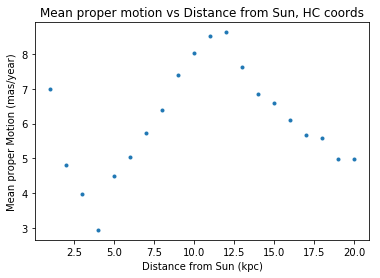

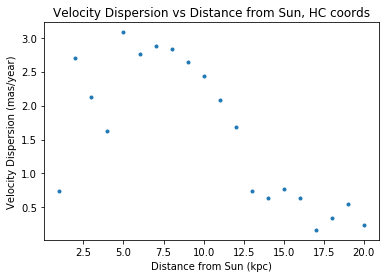

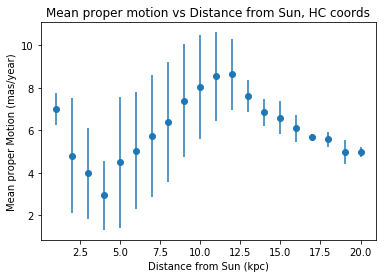

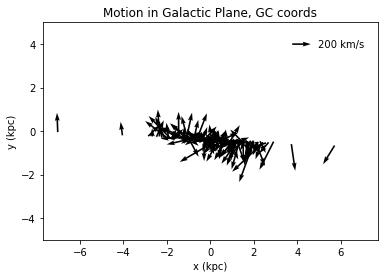

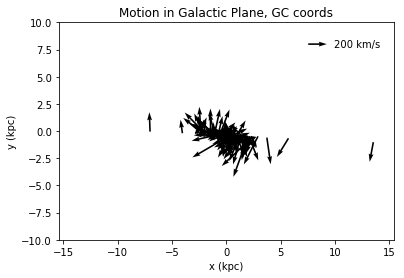

In [4]:
#load px, py, pz (cartesian heliocentric positions) 
HCx = np.loadtxt("testLOS_px") #kpc
HCy = np.loadtxt("testLOS_py") #kpc
HCz = np.loadtxt("testLOS_pz") #kpc

#load vx, vy, vz (cartesian heliocentric velocities) 
HCxvel = np.loadtxt("testLOS_vx") #km/s
HCyvel = np.loadtxt("testLOS_vy") #km/s
HCzvel = np.loadtxt("testLOS_vz") #km/s

#calculate the magnitude of the velocity and position vector in HC coordinates
HCvel = []
for i in np.arange(len(HCxvel)):
    HCvel.append(np.sqrt(HCxvel[i]**2 + HCyvel[i]**2 + HCzvel[i]**2))
HCvel = np.array(HCvel)

HCradius = []
for i in np.arange(len(HCx)):
    HCradius.append(np.sqrt(HCx[i]**2 + HCy[i]**2 + HCz[i]**2))
HCradius = np.array(HCradius)

HCvelvec = np.array([HCxvel, HCyvel, HCzvel])
HCposvec = np.array([HCx, HCy, HCz])
vDOTr = (HCxvel*HCx + HCyvel*HCy + HCzvel*HCz)/(HCradius)
rHAT = HCposvec/HCradius
propermotion = np.linalg.norm(HCvelvec - vDOTr*rHAT, axis = 0)/(4.74 * HCradius)

#calculate average proper motion and velocity dispersion as a function of distance from the Sun
HCvelvec = np.array([HCxvel, HCyvel, HCzvel])
HCposvec = np.array([HCx, HCy, HCz])
vDOTr = (HCxvel*HCx + HCyvel*HCy + HCzvel*HCz)/(HCradius)
rHAT = HCposvec/HCradius
allpropermotion = np.linalg.norm(HCvelvec - vDOTr*rHAT, axis = 0)/(4.74 * HCradius)

averagemotion = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
veldispersion = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in np.arange(20):
    propermotions = allpropermotion[(HCradius > i) & (HCradius <= i + 1)]
    averagemotion[i] = np.mean(propermotions)
    veldispersion[i] = np.std(propermotions)
radialdist = np.arange(1,21)

plt.plot(radialdist, averagemotion, '.')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Mean proper Motion (mas/year)")
plt.title("Mean proper motion vs Distance from Sun, HC coords")
plt.show()

plt.plot(radialdist, veldispersion, '.')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Velocity Dispersion (mas/year)")
plt.title("Velocity Dispersion vs Distance from Sun, HC coords")
plt.show()

plt.figure()
plt.errorbar(radialdist, averagemotion, yerr=veldispersion,fmt='o')
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("Mean proper Motion (mas/year)")
plt.title("Mean proper motion vs Distance from Sun, HC coords")
plt.show()

sun = np.loadtxt("testLOS_center") 
#first three values are positions in kpc
#last three values are velocities in km/s

#convert to galactocentric coordinates
GCx = HCx + sun[0]
GCy = HCy + sun[1]
GCz = HCz + sun[2]
GCxvel = HCxvel + sun[3]
GCyvel = HCyvel + sun[4]
GCzvel = HCzvel + sun[5]

i = 100
GCx = GCx[0::i]
GCy = GCy[0::i]
GCxvel = GCxvel[0::i]
GCyvel = GCyvel[0::i]

Q = plt.quiver(GCx, GCy, GCxvel, GCyvel)
qk = plt.quiverkey(Q, 0.8, 0.9, 200, r'200 km/s', labelpos='E')
plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("Motion in Galactic Plane, GC coords")
plt.show()

Q = plt.quiver(GCx, GCy, GCxvel, GCyvel)
qk = plt.quiverkey(Q, 0.8, 0.9, 200, r'200 km/s', labelpos='E')
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("Motion in Galactic Plane, GC coords")
plt.show()